In [2]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

def update(P, C, R, x_hat, obs, I):
    """
    P 誤差共分散行列
    C 観測係数行列
    R 観測ノイズ分散行列
    """

    #カルマンゲイン
    G = P * C.T * inv(C * P * C.T + R)
    x_hat = x_hat + G * (obs - C * x_hat)
    P = (I - G * C) * P
    return x_hat, P

[[ 2.53898378]
 [ 6.00073476]
 [ 1.01686573]]
[[  7.35712619e-04  -6.77905826e-05  -2.64583425e-05]
 [ -6.77905826e-05   6.70207010e-04   2.12042488e-05]
 [ -2.64583425e-05   2.12042488e-05   4.25007292e-03]]


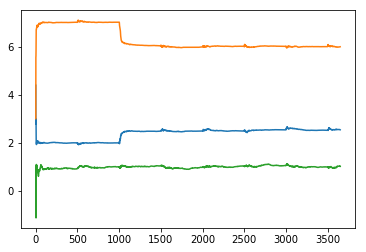

In [11]:
a = 2.
b = 7.
c = 1.

x = np.random.uniform(-5, 5, 3650)
x2 = np.random.uniform(-5, 5, 3650)
v = np.random.normal(0, 1, 3650)
y = []

a_hat = []
b_hat = []
c_hat = []

for i in range(3650):
    if i < 1000:
        y.append(a * x[i] + b * x2[i] + c + v[i])
    else:
        y.append((a + 0.5) * x[i] + (b - 1) * x2[i] + c + v[i])
    
    
P = np.mat(np.identity(3))
R = np.mat([1])
I = np.mat(np.identity(3))
x_hat = np.mat([[0],[0],[0]])
S =np.mat([[1, 0, 0], [0, 1, 0], [0, 0, 1]]) * 0.1

for i in range(3650):
    C = np.mat([x[i], x2[i], 1])
    obs = np.mat([y[i]])
    if (i % 500 == 0):
        P = P + S ** 2
    x_hat, P = update(P, C, R, x_hat, obs, I)
    a_hat.append(x_hat[0,0])
    b_hat.append(x_hat[1,0])
    c_hat.append(x_hat[2,0])

print(x_hat)
print(P)
plt.plot(a_hat)
plt.plot(b_hat)
plt.plot(c_hat)
plt.show()